In [14]:
import pandas as pd

data = pd.read_csv('data/nyc_data.csv')
data

,time_of_call,vic_age_group,vic_race,vic_sex,suspect_race,suspect_sex,precinct,borough,location_of_occurrence,premises,offence_description
0,09:30:00,65+,WHITE,F,NaN,NaN,121.0,STATEN ISLAND,FRONT OF,STREET,VEHICLE AND TRAFFIC LAWS
1,21:03:00,NaN,NaN,E,NaN,NaN,52.0,BRONX,NaN,STREET,DANGEROUS WEAPONS
2,19:40:00,NaN,WHITE HISPANIC,M,NaN,U,45.0,BRONX,INSIDE,RESIDENCE-HOUSE,OFF. AGNST PUB ORD SENSBLTY &
3,22:30:00,18-24,ASIAN / PACIFIC ISLANDER,M,NaN,U,14.0,MANHATTAN,NaN,STREET,GRAND LARCENY
4,14:00:00,NaN,NaN,D,NaN,U,19.0,MANHATTAN,INSIDE,NaN,PETIT LARCENY
...,...,...,...,...,...,...,...,...,...,...,...
8914833,20:30:00,45-64,WHITE,F,WHITE,M,62.0,BROOKLYN,INSIDE,RESIDENCE-HOUSE,HARRASSMENT 2
8914834,14:50:00,18-24,WHITE,F,WHITE,F,17.0,MANHATTAN,INSIDE,DRY CLEANER/LAUNDRY,HARRASSMENT 2
8914835,22:00:00,25-44,BLACK,F,NaN,NaN,105.0,QUEENS,FRONT OF,STREET,CRIMINAL MISCHIEF & RELATED OF
8914836,15:00:00,NaN,NaN,E,BLACK,M,43.0,BRONX,INSIDE,RESIDENCE - APT. HOUSE,OTHER STATE LAWS (NON PENAL LA


In [15]:

# generalize the offence_description column

data['offence_description'] = data['offence_description'].replace('PETIT LARCENY OF MOTOR VEHICLE', 'LARENCY OF MOTOR VEHICLE')
data['offence_description'] = data['offence_description'].replace('GRAND LARCENY OF MOTOR VEHICLE', 'LARENCY OF MOTOR VEHICLE')
data['offence_description'] = data['offence_description'].replace('UNAUTHORIZED USE OF A VEHICLE', 'LARENCY OF MOTOR VEHICLE')
data['offence_description'] = data['offence_description'].replace('HARRASSMENT 2', 'HARRASSMENT')
data['offence_description'] = data['offence_description'].replace('ASSAULT 3 & RELATED OFFENSES', 'ASSAULT')
data['offence_description'] = data['offence_description'].replace('FELONY ASSAULT', 'ASSAULT')
data['offence_description'] = data['offence_description'].replace('DANGEROUS DRUGS', 'DRUGS')
data['offence_description'] = data['offence_description'].replace('CANNABIS RELATED OFFENSES', 'DRUGS')
data['offence_description'] = data['offence_description'].replace('UNDER THE INFLUENCE OF DRUGS', 'DRUGS')
data['offence_description'] = data['offence_description'].replace('OFF. AGNST PUB ORD SENSBLTY &', 'OFFENCE AGAINST PUBLIC ORDER & SENSIBILITY')
data['offence_description'] = data['offence_description'].replace('DISRUPTION OF A RELIGIOUS SERV', 'OFFENCE AGAINST PUBLIC ORDER & SENSIBILITY')
data['offence_description'] = data['offence_description'].replace('DISORDERLY CONDUCT', 'OFFENCE AGAINST PUBLIC ORDER & SENSIBILITY')
data['offence_description'] = data['offence_description'].replace('BURGLAR\'S TOOLS', 'BURGLARY')
data['offence_description'] = data['offence_description'].replace('OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST PUBLIC SAFETY')
data['offence_description'] = data['offence_description'].replace('OTHER TRAFFIC INFRACTION', 'VEHICLE AND TRAFFIC LAWS')
data['offence_description'] = data['offence_description'].replace('INTOXICATED & IMPAIRED DRIVING','INTOXICATED/IMPAIRED DRIVING')
data['offence_description'] = data['offence_description'].replace('FRAUDULENT ACCOSTING','FRAUDS')
data['offence_description'] = data['offence_description'].replace('OFFENSES INVOLVING FRAUD', 'FRAUDS')
data['offence_description'] = data['offence_description'].replace('FRAUDULENT ACCOSTING', 'FRAUDS')
data['offence_description'] = data['offence_description'].replace('OTHER OFFENSES RELATED TO THEF', 'THEFT')
data['offence_description'] = data['offence_description'].replace('THEFT-FRAUD', 'THEFT')
data['offence_description'] = data['offence_description'].replace('THEFT OF SERVICES', 'THEFT')
data['offence_description'] = data['offence_description'].replace('NYS LAWS-UNCLASSIFIED FELONY', 'FELONY')
data['offence_description'] = data['offence_description'].replace('MURDER & NON-NEGL. MANSLAUGHTER', 'FELONY')
data['offence_description'] = data['offence_description'].replace('RAPE', 'FELONY')
data['offence_description'] = data['offence_description'].replace('KIDNAPPING', 'FELONY')
data['offence_description'] = data['offence_description'].replace('ARSON', 'FELONY')
data['offence_description'] = data['offence_description'].replace('LOITERING/DEVIATE SEX', 'SEX CRIMES')
data['offence_description'] = data['offence_description'].replace('FELONY SEX CRIMES', 'SEX CRIMES')
data['offence_description'] = data['offence_description'].replace('PROSTITUTION & RELATED OFFENSES', 'SEX CRIMES')
data['offence_description'] = data['offence_description'].replace('KIDNAPPING AND RELATED OFFENSES', 'OFFENSES AGAINST THE PERSON')
data['offence_description'] = data['offence_description'].replace('KIDNAPPING & RELATED OFFENSES', 'OFFENSES AGAINST THE PERSON')
data['offence_description'] = data['offence_description'].replace('OFFENSES RELATED TO CHILDREN', 'OFFENSES AGAINST THE PERSON')
data['offence_description'] = data['offence_description'].replace('CHILD ABANDONMENT/NON SUPPORT', 'OFFENSES AGAINST THE PERSON')
data['offence_description'] = data['offence_description'].replace('OFFENSES AGAINST MARRIAGE UNCL', 'OFFENSES AGAINST THE PERSON')
data['offence_description'] = data['offence_description'].replace('KIDNAPPING', 'OFFENSES AGAINST THE PERSON')
data['offence_description'] = data['offence_description'].replace('ANTICIPATORY OFFENSES','OFFENSES AGAINST THE PERSON')
data['offence_description'] = data['offence_description'].replace('CARDS','GAMBLING')
data['offence_description'] = data['offence_description'].replace('LOITERING/GAMBLING', 'GAMBLING')
data['offence_description'] = data['offence_description'].replace('ADMINISTRATIVE CODE', 'ADMINISTRATIVE OFFENSES')
data['offence_description'] = data['offence_description'].replace('ADMINISTRATIVE CODES', 'ADMINISTRATIVE OFFENSES')
data['offence_description'] = data['offence_description'].replace('UNLAWFUL POSS. WEAP. ON SCHOOL', 'DANGEROUS WEAPONS')
data['offence_description'] = data['offence_description'].replace('AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('NYS LAWS-UNCLASSIFIED VIOLATION', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('NYS LAWS-UNCLASSIFIED FELONY', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('OTHER STATE LAWS (NON PENAL LA', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('OTHER STATE LAWS (NON PENAL LAW)', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('OTHER STATE LAWS', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('MISCELLANEOUS PENAL LAW', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('JOSTLING', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('ENDAN WELFARE INCOMP', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('LOITERING/GAMBLING (CARDS, DIC', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('ESCAPE 3', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('HOMICIDE-NEGLIGENT-VEHICLE', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('NEW YORK CITY HEALTH CODE', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('LOITERING', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('LOITERING FOR DRUG PURPOSES', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('FORTUNE TELLING', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('ABORTION', 'UNKNOWN')
data['offence_description'] = data['offence_description'].replace('ALCOHOLIC BEVERAGE CONTROL LAW', 'UNKNOWN')

# remove duplicate rows
data['premises'] = data['premises'].replace('BEAUTY & NAIL SALON','BEAUTY/NAIL SALON')
data['premises'] = data['premises'].replace('CHECK CASHING BUSINESS','CHECK CASH')
data['premises'] = data['premises'].replace('CLOTHING/BOUTIQUE', 'CLOTHING BOUTIQUE')
data['premises'] = data['premises'].replace('COMMERCIAL BLDG', 'COMMERCIAL BUILDING')
data['premises'] = data['premises'].replace('DEPARTMENT STORE', 'DEPT STORE')
data['premises'] = data['premises'].replace('DOCTOR/DENTIST OFFICE','DOCTOR/DENTIST')
data['premises'] = data['premises'].replace('FOOD SUPERMARKET','SUPERMARKET')
data['premises'] = data['premises'].replace('JEWELRY STORE','JEWELRY')
data['premises'] = data['premises'].replace('SHOE STORE','SHOE')
data['premises'] = data['premises'].replace('SOCIAL CLUB/POLICY LOCATI', 'SOCIAL CLUB/POLICY')

# # Drop rows with missing values in used columns
# data.dropna(subset=used_col_names + ['offence_description'], inplace=True)

In [16]:
# group by offence_description and sort by the number of crimes in each category
data_grouped = data.groupby('offence_description').size().sort_values(ascending=False)
print(data_grouped)

offence_description
PETIT LARCENY                                 1556986
ASSAULT                                       1299371
HARRASSMENT                                   1187341
CRIMINAL MISCHIEF & RELATED OF                 876491
GRAND LARCENY                                  783549
DRUGS                                          457050
OFFENCE AGAINST PUBLIC ORDER & SENSIBILITY     437997
ROBBERY                                        314986
BURGLARY                                       302125
UNKNOWN                                        247134
LARENCY OF MOTOR VEHICLE                       202501
DANGEROUS WEAPONS                              181945
OFFENSES AGAINST PUBLIC SAFETY                 158249
VEHICLE AND TRAFFIC LAWS                       136469
SEX CRIMES                                     113974
THEFT                                          112925
INTOXICATED/IMPAIRED DRIVING                   105300
CRIMINAL TRESPASS                               88783
FORGERY 

In [17]:
sample = data

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


def convert_time_to_minutes(row):
    try:
        temp = row.split(':')
        return int(temp[0])*60 + int(temp[1])
    except ValueError:
        return None
    except AttributeError:
        return None

sample.loc[:, 'time_of_call'] = sample.time_of_call.apply(convert_time_to_minutes)

time_normalizer = MinMaxScaler().fit(sample[['time_of_call']])
sample.loc[:, 'time_of_call'] = time_normalizer.transform(sample[['time_of_call']]).astype('float')


vic_age_encoder = LabelEncoder().fit(sample.vic_age_group)
sample.loc[:, 'vic_age_group'] = vic_age_encoder.transform(sample.vic_age_group).astype('int')

vic_race_encoder = LabelEncoder().fit(sample.vic_race)
sample.loc[:, 'vic_race'] = vic_race_encoder.transform(sample.vic_race).astype('int')

vic_sex_encoder = LabelEncoder().fit(sample.vic_sex)
sample.loc[:, 'vic_sex'] = vic_sex_encoder.transform(sample.vic_sex).astype('int')

suspect_race_encoder = LabelEncoder().fit(sample.suspect_race)
sample.loc[:, 'suspect_race'] = suspect_race_encoder.transform(sample.suspect_race).astype('int')

suspect_sex_encoder = LabelEncoder().fit(sample.suspect_sex)
sample.loc[:, 'suspect_sex'] = suspect_sex_encoder.transform(sample.suspect_sex).astype('int')

precinct_encoder = LabelEncoder().fit(sample.precinct)
sample.loc[:, 'precinct'] = precinct_encoder.transform(sample.precinct).astype('float')

borough_encoder = LabelEncoder().fit(sample.borough)
sample.loc[:, 'borough'] = borough_encoder.transform(sample.borough).astype('int')

location_of_occurrence_encoder = LabelEncoder().fit(sample.location_of_occurrence)
sample.loc[:, 'location_of_occurrence'] = location_of_occurrence_encoder.transform(sample.location_of_occurrence).astype('int')

premises_encoder = LabelEncoder().fit(sample.premises)
sample.loc[:, 'premises'] = premises_encoder.transform(sample.premises).astype('int')

offence_description_encoder = LabelEncoder().fit(sample.offence_description)
sample.loc[:, 'offence_description'] = offence_description_encoder.transform(sample.offence_description).astype('int')

sample

,time_of_call,vic_age_group,vic_race,vic_sex,suspect_race,suspect_sex,precinct,borough,location_of_occurrence,premises,offence_description
0,0.396108,185,5,2,7,3,74.0,4,0,69,24
1,0.877693,282,7,1,7,3,33.0,0,5,69,5
2,0.820014,282,6,4,7,2,27.0,0,1,60,15
3,0.938151,127,1,4,7,2,7.0,2,5,69,11
4,0.583739,282,7,0,7,2,10.0,2,1,82,18
...,...,...,...,...,...,...,...,...,...,...,...
8914833,0.85476,171,5,2,5,1,36.0,1,1,60,12
8914834,0.618485,127,5,2,5,0,8.0,2,1,25,12
8914835,0.917304,145,2,2,7,3,62.0,3,0,69,3
8914836,0.625434,282,7,1,2,1,25.0,0,1,58,23


In [22]:
sample_grouped = sample.groupby('offence_description').size().sort_values(ascending=False)
print(sample_grouped)

offence_description
18    1556986
1     1299371
12    1187341
3      876491
11     783549
6      457050
15     437997
20     314986
2      302125
23     247134
14     202501
5      181945
16     158249
24     136469
21     113974
22     112925
13     105300
4       88783
8       88602
9       87472
7       62991
19      42518
17      27681
0       19954
25      18888
10       3556
dtype: int64


In [23]:
# remove rows with less than 1000 crimes and level up and delete random rows to have maximum 50000 crimes for each category

# Step 1 & 2: Group by category and count occurrences
counts = sample['offence_description'].value_counts()

# Step 3: Filter out categories with less than 1000 occurrences
sample = sample[sample['offence_description'].isin(counts[counts > 1000].index)]

# Step 4: For categories with more than 50000 occurrences, randomly select 50000 rows
def sample_func(group):
    if len(group) > 50000:
        return group.sample(50000)
    else:
        return group

sample = sample.groupby('offence_description').apply(sample_func).reset_index(drop=True)
sample

C:\Users\pasha\AppData\Local\Temp\ipykernel_1764\158056540.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = sample.groupby('offence_description').apply(sample_func).reset_index(drop=True)


,time_of_call,vic_age_group,vic_race,vic_sex,suspect_race,suspect_sex,precinct,borough,location_of_occurrence,premises,offence_description
0,0.027797,171,2,2,2,1,39.0,1,1,60,0
1,0.76303,171,2,4,7,1,74.0,4,1,58,0
2,0.52467,282,7,2,1,0,49.0,1,1,58,0
3,0.841557,145,2,2,2,1,29.0,0,1,60,0
4,0.867964,282,7,1,2,1,45.0,1,5,77,0
...,...,...,...,...,...,...,...,...,...,...,...
1162592,0.649757,185,5,2,7,3,67.0,3,1,58,25
1162593,0.4795,282,7,1,7,3,69.0,3,5,77,25
1162594,0.875608,127,2,2,2,2,18.0,2,1,58,25
1162595,0.802641,282,7,1,7,3,48.0,1,1,54,25


In [24]:
sample_grouped = sample.groupby('offence_description').size().sort_values(ascending=False)
sample_grouped

offence_description
13    50000
23    50000
21    50000
20    50000
18    50000
16    50000
15    50000
14    50000
1     50000
12    50000
11    50000
24    50000
9     50000
8     50000
7     50000
6     50000
5     50000
4     50000
3     50000
2     50000
22    50000
19    42518
17    27681
0     19954
25    18888
10     3556
dtype: int64

In [63]:
# mix rows of the sample
sample = sample.sample(frac=1).reset_index(drop=True)
sample

,time_of_call,vic_age_group,vic_race,vic_sex,suspect_race,suspect_sex,precinct,borough,location_of_occurrence,premises,offence_description
0,05:00:00,45-64,WHITE HISPANIC,M,WHITE,M,67.0,BROOKLYN,FRONT OF,RESIDENCE - APT. HOUSE,ADMINISTRATIVE OFFENSES
1,12:16:00,25-44,ASIAN / PACIFIC ISLANDER,F,BLACK,M,103.0,QUEENS,FRONT OF,RESIDENCE-HOUSE,BURGLARY
2,22:00:00,45-64,BLACK,F,BLACK,F,73.0,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,CRIMINAL MISCHIEF & RELATED OF
3,18:00:00,<18,BLACK,F,BLACK,F,47.0,BRONX,INSIDE,RESIDENCE - APT. HOUSE,SEX CRIMES
4,10:30:00,25-44,BLACK,F,BLACK HISPANIC,M,23.0,MANHATTAN,INSIDE,RESIDENCE - PUBLIC HOUSING,ASSAULT
...,...,...,...,...,...,...,...,...,...,...,...
100207,13:50:00,45-64,WHITE HISPANIC,M,WHITE HISPANIC,U,47.0,BRONX,REAR OF,RESIDENCE - APT. HOUSE,CRIMINAL TRESPASS
100208,15:00:00,<18,WHITE HISPANIC,M,BLACK,M,46.0,BRONX,REAR OF,PUBLIC SCHOOL,CRIMINAL TRESPASS
100209,12:00:00,45-64,WHITE HISPANIC,F,WHITE HISPANIC,F,23.0,MANHATTAN,FRONT OF,RESIDENCE - PUBLIC HOUSING,OFFENCE AGAINST PUBLIC ORDER & SENSIBILITY
100210,15:01:00,45-64,AMERICAN INDIAN/ALASKAN NATIVE,M,BLACK,M,73.0,BROOKLYN,FRONT OF,STREET,THEFT


In [64]:
sample.to_csv('data/nyc_data_cleaned.csv', index=False)

In [25]:
# train lgbm model
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# Algorithm	LightGBM
# Booster	gbdt
# Actual number of trees	56
# Maximum number of leaves	31
# Learning rate	0.1
# Alpha (L1 regularization)	0
# Lambda (L2 regularization)	0
# Minimal gain to perform a split on a leaf	0
# Min sum of instance weight in a child	0.001
# Subsample ratio of the training instance	1
# Columns subsample ratio for trees	0.7

model = lgb.LGBMClassifier(n_estimators=56, num_leaves=31, learning_rate=0.1, reg_alpha=0, reg_lambda=0, min_gain_to_split=0, min_child_weight=0.001, subsample=1, colsample_bytree=0.7)
X = sample.drop(columns=['offence_description'])
y = sample['offence_description']
y=y.astype('int')
X = X.astype('float')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 930077, number of used features: 10
[LightGBM] [Info] Start training from score -4.061991
[LightGBM] [Info] Start training from score -3.144415
[LightGBM] [Info] Start training from score -3.145164
[LightGBM] [Info] Start training from score -3.148215
[LightGBM] [Info] Start training from score -3.151677
[LightGBM] [Info] Start training from score -3.144939
[LightGBM] [Info] Start training from score -3.143766
[LightGBM] [Info] Start train

LGBMClassifier(colsample_bytree=0.7, min_gain_to_split=0, n_estimators=56,
               reg_alpha=0, reg_lambda=0, subsample=1)

In [28]:
# save model
import joblib

joblib.dump(model, 'lgbm_model_50000_max_threashold.pkl')

['lgbm_model_50000_max_threashold.pkl']

In [44]:
# evaluate model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# f score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)


[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
Accuracy: 0.3525460175468777
F1 Score: 0.33129081661313087


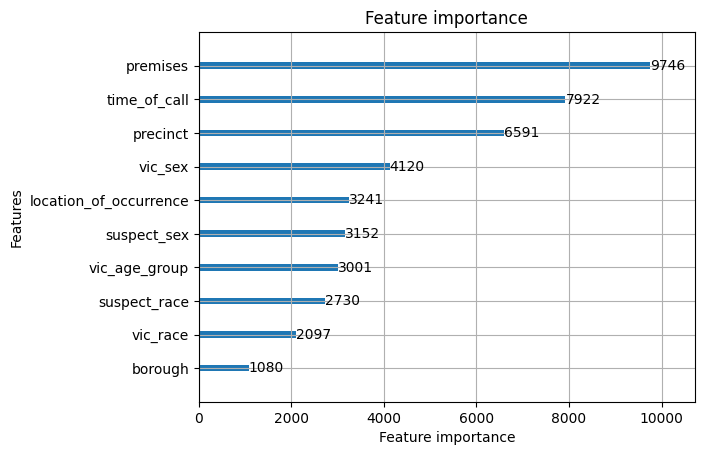

In [27]:
# plot feature importance
import matplotlib.pyplot as plt

lgb.plot_importance(model, max_num_features=10)
plt.show()

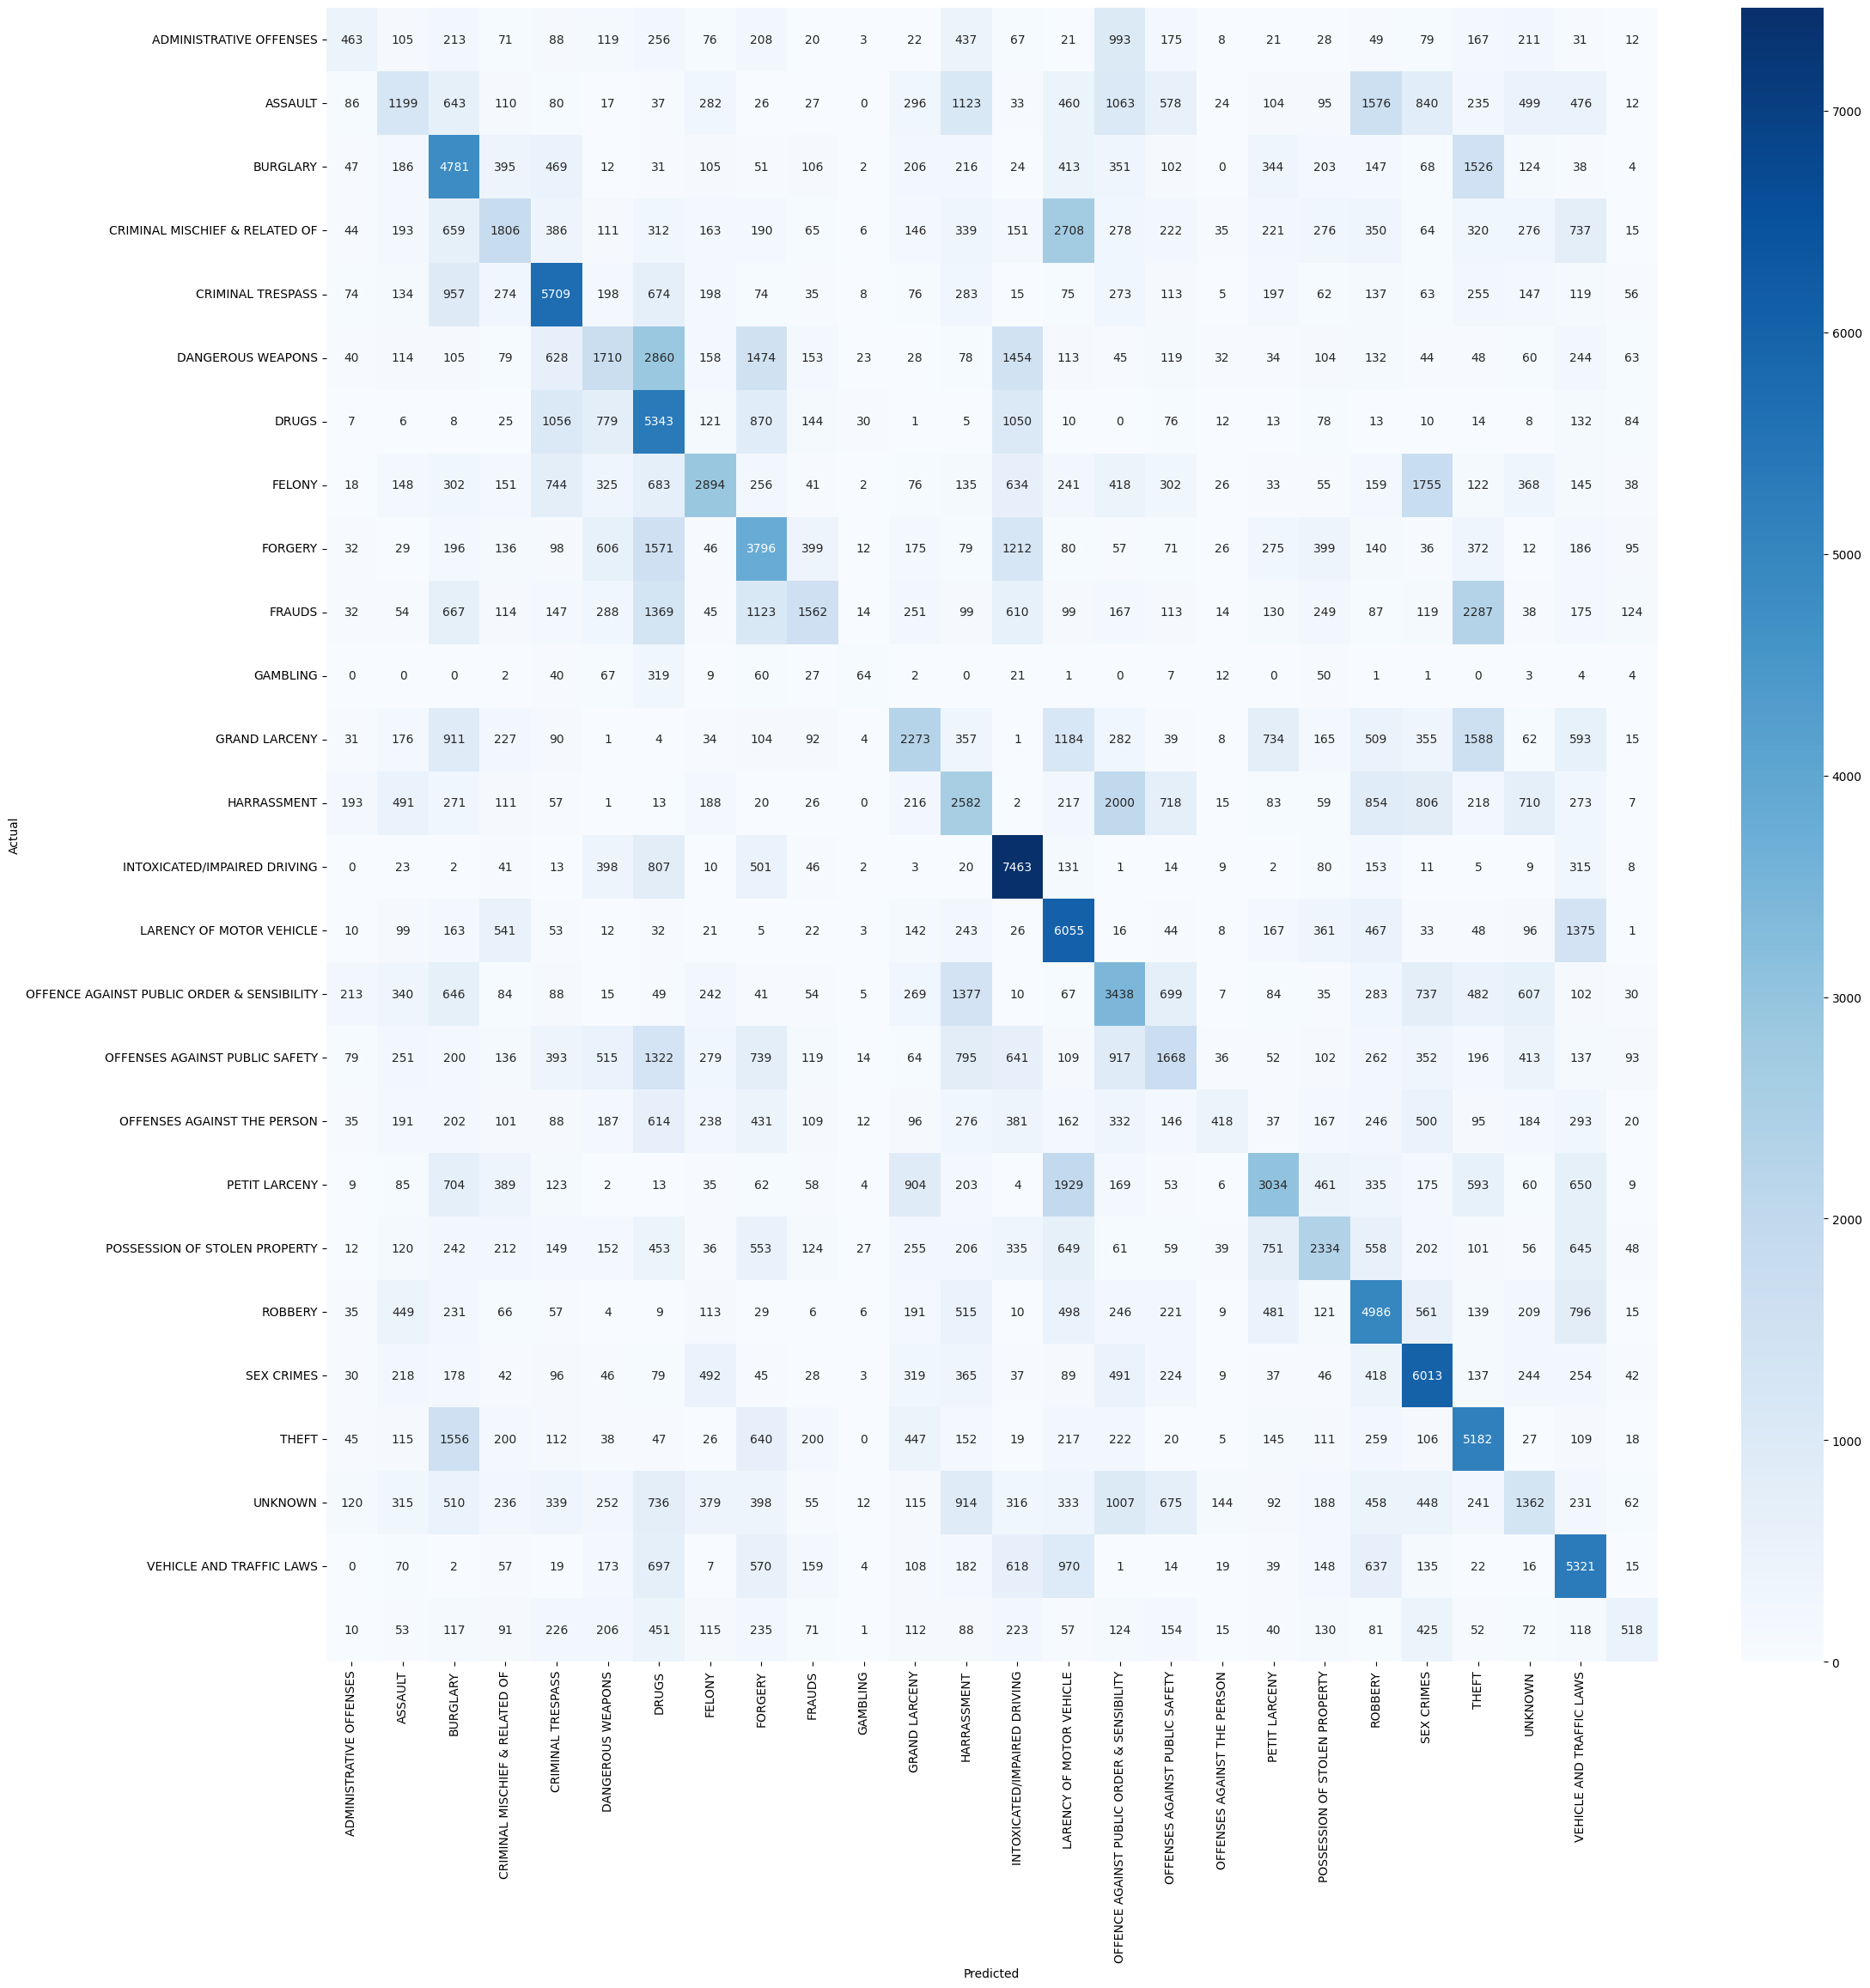

In [43]:
# draw confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# plot with inverse transform of labels
plt.figure(figsize=(25, 25))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=offence_description_encoder.inverse_transform(range(0, 25)),
            yticklabels=offence_description_encoder.inverse_transform(range(0, 25)), cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
